About Dataset
The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Dataset columns:

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations

Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90

Ws :Wind speed in km/h: 6 to 29

Rain: total day in mm: 0 to 16.8 FWI Components

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

Drought Code (DC) index from the FWI system: 7 to 220.4

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

Buildup Index (BUI) index from the FWI system: 1.1 to 68

Fire Weather Index (FWI) Index: 0 to 31.1

Classes: two classes, namely Fire and not Fire

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [44]:
import zipfile
import os

zip_path = "algerian-forest-fires-cleaned-dataset.zip"
extract_to = "C:/Users/pc/Desktop"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


In [45]:
# Open the file as a dataframe
file_path = r'C:\Users\pc\Desktop\Algerian_forest_fires_cleaned_dataset.csv'
df = pd.read_csv(file_path)
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [46]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [48]:
df.describe(exclude='O')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [49]:
df.corr(numeric_only=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734


<Axes: >

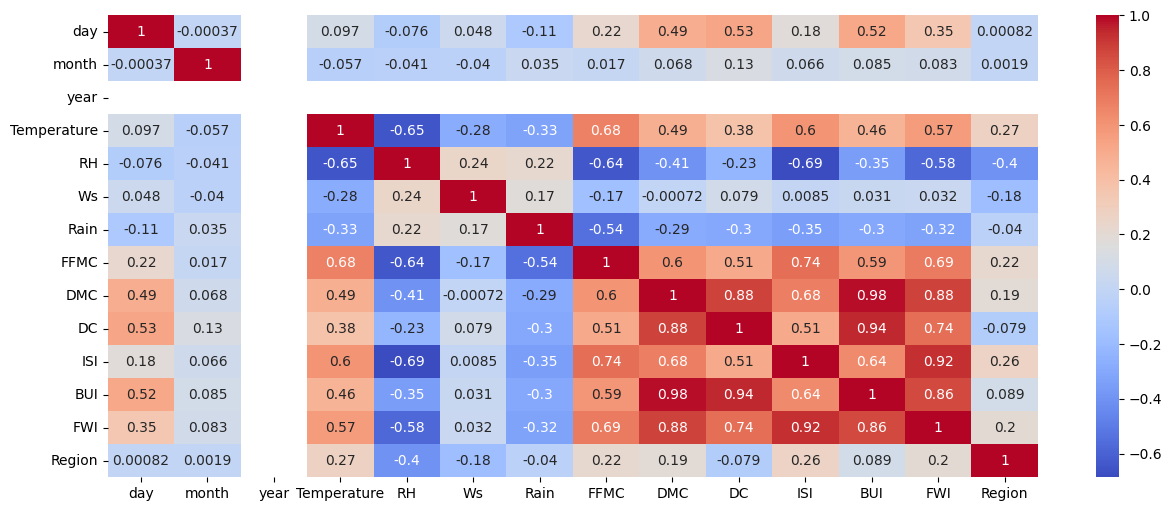

In [50]:
import seaborn as sns
plt.figure(figsize=(15,6))
plt.tight_layout()
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm')

In [51]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [52]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [53]:
# Now we will do encoding so as make categories as numeric
category = df.select_dtypes(include=['object', 'category', 'bool']).columns
category,df.dtypes


(Index(['Classes'], dtype='object'),
 day              int64
 month            int64
 year             int64
 Temperature      int64
 RH               int64
 Ws               int64
 Rain           float64
 FFMC           float64
 DMC            float64
 DC             float64
 ISI            float64
 BUI            float64
 FWI            float64
 Classes         object
 Region           int64
 dtype: object)

In [54]:
# we can also create a function to check for unique values in a column
def isUnique(dataset, *args):
    column = args if args else dataset.columns
    for col in column:
        print(f"Unique Values in {col} are :  {dataset[col].unique()}\n")


# isUnique(df, [column for column in df.columns])
# isUnique(df, *df.columns)
isUnique(df)



Unique Values in day are :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]

Unique Values in month are :  [6 7 8 9]

Unique Values in year are :  [2012]

Unique Values in Temperature are :  [29 26 25 27 31 33 30 28 32 34 35 36 37 22 24 38 39 40 42]

Unique Values in RH are :  [57 61 82 89 77 67 54 73 88 79 65 81 84 78 80 55 62 66 64 53 47 50 68 75
 76 63 69 70 59 48 45 60 51 52 58 86 74 71 49 44 41 42 90 87 72 46 37 36
 56 43 83 29 34 33 35 39 31 21 40 24 38 26]

Unique Values in Ws are :  [18 13 22 16 14 15 12 19 21 20 17 26 11 10  9  8  6 29]

Unique Values in Rain are :  [ 0.   1.3 13.1  2.5  0.2  1.2  0.5  3.1  0.7  0.6  0.3  0.1  0.4  1.
  1.4  0.8 16.8  7.2 10.1  3.8  0.9  1.8  4.6  8.3  5.8  4.   2.   4.7
  8.7  4.5  1.1  1.7  2.2  6.   1.9  2.9  4.1  6.5  4.4]

Unique Values in FFMC are :  [65.7 64.4 47.1 28.6 64.8 82.6 88.2 86.6 52.9 73.2 84.5 84.  50.  59.
 49.4 36.1 37.3 56.9 79.9 59.8 81.  79.1 81.4 85.9 86.7 86.8 89.  89.1
 

In [55]:
# For getting the count of unique values which is helpful in large datasets we use nunique()
def isCount(dataset, *args):
    column = args if args else dataset.columns
    for col in column:
        unique_value_count = dataset[col].nunique(dropna=True)
        print(f'The column {col} has {unique_value_count} unique values.\n')

isCount(df, *df.columns)

The column day has 31 unique values.

The column month has 4 unique values.

The column year has 1 unique values.

The column Temperature has 19 unique values.

The column RH has 62 unique values.

The column Ws has 18 unique values.

The column Rain has 39 unique values.

The column FFMC has 173 unique values.

The column DMC has 165 unique values.

The column DC has 197 unique values.

The column ISI has 106 unique values.

The column BUI has 173 unique values.

The column FWI has 125 unique values.

The column Classes has 8 unique values.

The column Region has 2 unique values.



In [ ]:
# For large datasets we can convert the output to a dict or list
df.nunique().tolist()


[31, 4, 1, 19, 62, 18, 39, 173, 165, 197, 106, 173, 125, 8, 2]